In [1]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import _pickle as pickle
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import MinMaxScaler
import random
from sklearn.decomposition import PCA
from tqdm import tqdm_notebook as tqdm
from sklearn.metrics import calinski_harabasz_score, silhouette_score, davies_bouldin_score

In [2]:
#Generate dummy data
def create_data(x):
    fake_profiles = { }
    for i in range (0,x):
        fake_profiles[i]={}
        fake_profiles[i]['ID']=i+1
        fake_profiles[i]['Age']=np.random.randint(18,71)
        fake_profiles[i]['Handedness']=np.random.randint(1,3)
        fake_profiles[i]['Height']=np.random.randint(150,200)
        fake_profiles[i]['Weight']=np.random.randint(50,150)
        fake_profiles[i]['Location']=np.random.randint(1,4)
        fake_profiles[i]['W/L Ratio']=np.random.uniform(0,5)
        fake_profiles[i]['# of Matches']=np.random.randint(0,101)
        fake_profiles[i]['Rank']=int(fake_profiles[i]['W/L Ratio'] * fake_profiles[i]['# of Matches'])
        fake_profiles[i]['Gender']=np.random.randint(1,3)
        fake_profiles[i]['Time']=np.random.randint(0,24)
    return fake_profiles 
        
        
users = create_data(1000)
df = pd.DataFrame.from_dict(users, orient='index')

In [3]:
df.head()

,ID,Age,Handedness,Height,Weight,Location,W/L Ratio,# of Matches,Rank,Gender,Time
0,1,52,1,172,127,1,3.664777,28,102,2,15
1,2,48,1,180,63,3,4.734925,73,345,1,2
2,3,32,1,186,59,1,4.552773,44,200,1,14
3,4,32,1,186,136,3,2.208174,72,158,2,8
4,5,20,2,173,98,1,0.119549,73,8,1,4


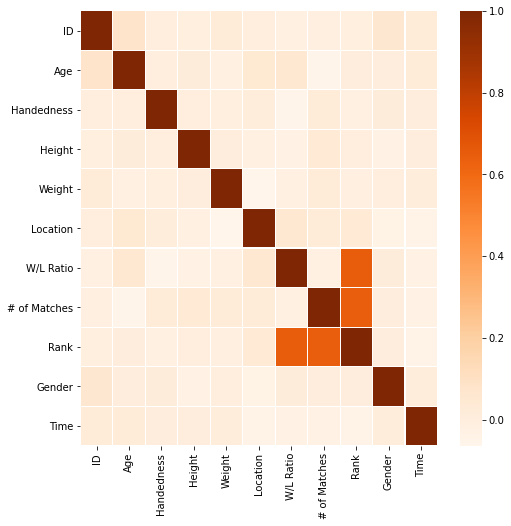

In [4]:
correlation_matrix = df.corr()
plt.figure(figsize=(8,8))
sns.heatmap(correlation_matrix, annot= False, linewidth=0.1, cmap= 'Oranges')

In [5]:
new_df=df.copy()

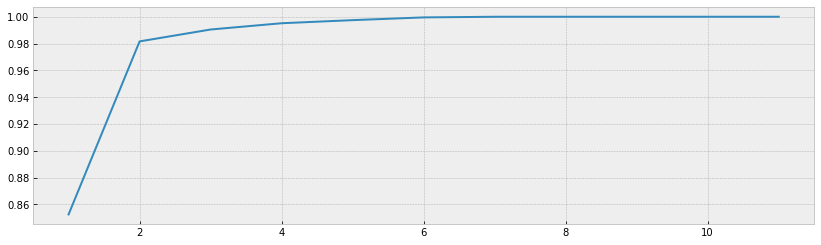

Number features: 1
Total Variance Explained: 0.9816060929759334
0.8525191250733143


In [6]:
# Instantiating PCA
pca = PCA()

# Fitting and Transforming the DF
df_pca = pca.fit_transform(new_df)

# Plotting to determine how many features should the dataset be reduced to
plt.style.use("bmh")
plt.figure(figsize=(14,4))
plt.plot(range(1,new_df.shape[1]+1), pca.explained_variance_ratio_.cumsum())
plt.show()

# Finding the exact number of features that explain at least 95% of the variance in the dataset
total_explained_variance = pca.explained_variance_ratio_.cumsum()
n_over_95 = len(total_explained_variance[total_explained_variance>=.95])
n_to_reach_95 = new_df.shape[1] - n_over_95

# Printing out the number of features needed to retain 95% variance
print(f"Number features: {n_to_reach_95}\nTotal Variance Explained: {total_explained_variance[n_to_reach_95]}")

# Reducing the dataset to the number of features determined before
pca = PCA(n_components=n_to_reach_95)

# Fitting and transforming the dataset to the stated number of features and creating a new DF
df_pca = pca.fit_transform(new_df)

# Seeing the variance ratio that still remains after the dataset has been reduced
print(pca.explained_variance_ratio_.cumsum()[-1])

In [7]:
# Setting the amount of clusters to test out
cluster_cnt = [i for i in range(2, 13, 1)]

# Establishing empty lists to store the scores for the evaluation metrics
s_scores = []

db_scores = []

# Looping through different iterations for the number of clusters
for i in cluster_cnt:
    
    # Hierarchical Agglomerative Clustering with different number of clusters
    #hac = AgglomerativeClustering(n_clusters=i)
    
    #hac.fit(df_pca)
    
    #cluster_assignments = hac.labels_
    
    ## KMeans Clustering with different number of clusters
    k_means = KMeans(n_clusters=i)
    
    k_means.fit(df_pca)
    
    cluster_assignments = k_means.predict(df_pca)
    
    # Appending the scores to the empty lists    
    s_scores.append(silhouette_score(df_pca, cluster_assignments))
    
    db_scores.append(davies_bouldin_score(df_pca, cluster_assignments))

Max Value:
Cluster #    Cluster Score
2       0.625928

Min Value:
Cluster #     Cluster Score
12       0.530375


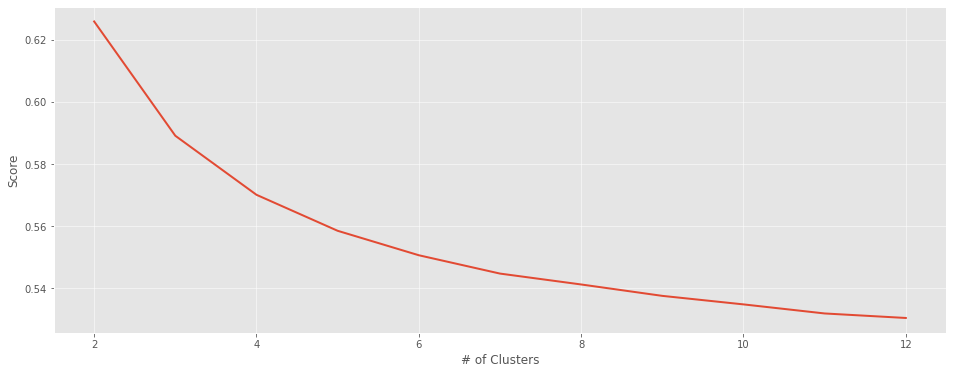

Max Value:
Cluster #    Cluster Score
9       0.500427

Min Value:
Cluster #    Cluster Score
3       0.499823


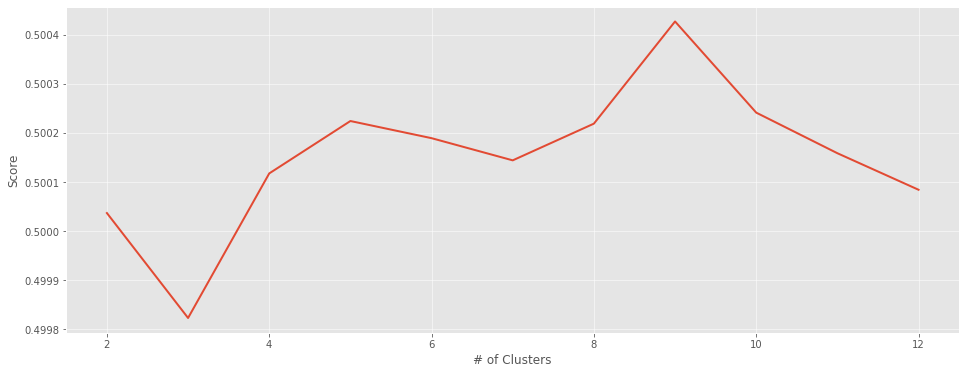

In [8]:
def plot_evaluation(y, x=cluster_cnt):
    """
    Plots the scores of a set evaluation metric. Prints out the max and min values of the evaluation scores.
    """
    
    # Creating a DataFrame for returning the max and min scores for each cluster
    new_df = pd.DataFrame(columns=['Cluster Score'], index=[i for i in range(2, len(y)+2)])
    new_df['Cluster Score'] = y
    
    print('Max Value:\nCluster #', new_df[new_df['Cluster Score']==new_df['Cluster Score'].max()])
    print('\nMin Value:\nCluster #', new_df[new_df['Cluster Score']==new_df['Cluster Score'].min()])
    
    # Plotting out the scores based on cluster count
    plt.figure(figsize=(16,6))
    plt.style.use('ggplot')
    plt.plot(x,y)
    plt.xlabel('# of Clusters')
    plt.ylabel('Score')
    plt.show()
    
# Running the function on the list of scores
plot_evaluation(s_scores)

plot_evaluation(db_scores)

In [9]:
# Instantiating HAC
#hac = AgglomerativeClustering(n_clusters=3)

# Fitting
#hac.fit(df_pca)

# Getting cluster assignments
#cluster_assignments = hac.labels_

# Assigning the clusters to each profile
#df['Cluster #'] = cluster_assignments

k_means = KMeans(n_clusters=3)
    
k_means.fit(df_pca)
    
cluster_assignments = k_means.labels_

# Assigning the clusters to each profile
new_df['Cluster #'] = cluster_assignments

# Viewing the profiles with cluster assignments
new_df

,ID,Age,Handedness,Height,Weight,Location,W/L Ratio,# of Matches,Rank,Gender,Time,Cluster #
0,1,52,1,172,127,1,3.664777,28,102,2,15,0
1,2,48,1,180,63,3,4.734925,73,345,1,2,0
2,3,32,1,186,59,1,4.552773,44,200,1,14,0
3,4,32,1,186,136,3,2.208174,72,158,2,8,0
4,5,20,2,173,98,1,0.119549,73,8,1,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,65,2,161,140,2,0.009646,69,0,1,9,2
996,997,63,2,158,127,3,0.769116,24,18,2,22,2
997,998,48,2,184,111,3,3.827074,82,313,1,19,2
998,999,50,1,183,140,2,4.769524,0,0,1,10,2


In [10]:
#save clustered profiles
#new_df.to_csv("/Users/nawalaleissa/Desktop/TennisClusterData.csv", index=False)

In [11]:
dfc=new_df

## Create new profiles

In [12]:
# Instantiating a new DF row to append later
new_profile = pd.DataFrame(columns=df.columns)

# Adding random values for new data
for i in new_profile.columns[1:2]:
    new_profile[i] = np.random.randint(18,71,1)
    
for i in new_profile.columns[2:3]:
    new_profile[i] = np.random.randint(1,3,1) 
    
for i in new_profile.columns[3:4]:
    new_profile[i] = np.random.randint(150,200,1)
    
for i in new_profile.columns[4:5]:
    new_profile[i] = np.random.randint(50,150,1)
    
for i in new_profile.columns[5:6]:
    new_profile[i] = np.random.randint(1,4,1)
    
for i in new_profile.columns[6:7]:
    new_profile[i] = np.random.uniform(0,5)


for i in new_profile.columns[7:8]:
    new_profile[i] = np.random.randint(0,101,1)
    
    
for i in new_profile.columns[8:9]:
    new_profile[i] = np.random.randint(0,505,1)
    
for i in new_profile.columns[9:10]:
    new_profile[i] = np.random.randint(1,3,1)
    
for i in new_profile.columns[10:]:
    new_profile[i] = np.random.randint(0,24,1)

# Asking for new profile data
new_profile['ID'] = input("Enter your ID: ")

# Indexing that new profile data
new_profile.index = [df.index[-1] + 1]

Enter your ID: 1001


In [13]:
new_profile

,ID,Age,Handedness,Height,Weight,Location,W/L Ratio,# of Matches,Rank,Gender,Time
1000,1001,55,1,195,66,3,2.576438,29,80,2,11


In [14]:
# Appending the new data
new_cluster = df.append(new_profile)

In [15]:
new_cluster

,ID,Age,Handedness,Height,Weight,Location,W/L Ratio,# of Matches,Rank,Gender,Time
0,1,52,1,172,127,1,3.664777,28,102,2,15
1,2,48,1,180,63,3,4.734925,73,345,1,2
2,3,32,1,186,59,1,4.552773,44,200,1,14
3,4,32,1,186,136,3,2.208174,72,158,2,8
4,5,20,2,173,98,1,0.119549,73,8,1,4
...,...,...,...,...,...,...,...,...,...,...,...
996,997,63,2,158,127,3,0.769116,24,18,2,22
997,998,48,2,184,111,3,3.827074,82,313,1,19
998,999,50,1,183,140,2,4.769524,0,0,1,10
999,1000,44,1,195,130,2,0.257539,21,5,1,3


In [16]:
# Instantiating PCA
pca = PCA()

# Fitting and Transforming the DF
df_pca = pca.fit_transform(new_df)

# Finding the exact number of features that explain at least 99% of the variance in the dataset
total_explained_variance = pca.explained_variance_ratio_.cumsum()
n_over_99 = len(total_explained_variance[total_explained_variance>=.99])
n_to_reach_99 = new_df.shape[1] - n_over_99

# Reducing the dataset to the number of features determined before
pca = PCA(n_components=n_to_reach_99)

# Fitting and transforming the dataset to the stated number of features
df_pca = pca.fit_transform(new_df)

# Seeing the variance ratio that still remains after the dataset has been reduced
pca.explained_variance_ratio_.cumsum()[-1]

0.9816054612109827

In [17]:
from tqdm import tqdm_notebook as tqdm
from sklearn.metrics import calinski_harabasz_score, silhouette_score, davies_bouldin_score
# Setting the amount of clusters to test out
cluster_cnt = [i for i in range(2, 13, 1)]

# Establishing empty lists to store the scores for the evaluation metrics
ch_scores = []

s_scores = []

db_scores = []

# Looping through different iterations for the number of clusters
for i in tqdm(cluster_cnt):
    
    # Clustering with different number of clusters
    #hac = AgglomerativeClustering(n_clusters=i)
    
    #hac.fit(df_pca)
    
    #cluster_assignments = hac.labels_
    
    ## KMeans Clustering with different number of clusters
    k_means = KMeans(n_clusters=i)
    
    k_means.fit(df_pca)
    
    cluster_assignments = k_means.predict(df_pca)
    
    # Appending the scores to the empty lists
    ch_scores.append(calinski_harabasz_score(df_pca, cluster_assignments))
    
    s_scores.append(silhouette_score(df_pca, cluster_assignments))
    
    db_scores.append(davies_bouldin_score(df_pca, cluster_assignments))

<ipython-input-17-d1b9491ed2a8>:14: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(cluster_cnt):


In [18]:
def cluster_eval(y, x):
    """
    Prints the scores of a set evaluation metric. Prints out the max and min values of the evaluation scores.
    """
    
    # Creating a DataFrame for returning the max and min scores for each cluster
    df = pd.DataFrame(columns=['Cluster Score'], index=[i for i in range(2, len(y)+2)])
    df['Cluster Score'] = y
    
    print('Max Value:\nCluster #', df[df['Cluster Score']==df['Cluster Score'].max()])
    print('\nMin Value:\nCluster #', df[df['Cluster Score']==df['Cluster Score'].min()])

In [19]:
print("The Calinski-Harabasz Score (find max score):")
cluster_eval(ch_scores, cluster_cnt)

print("\nThe Silhouette Coefficient Score (find max score):")
cluster_eval(s_scores, cluster_cnt)

print("\nThe Davies-Bouldin Score (find minimum score):")
cluster_eval(db_scores, cluster_cnt)

The Calinski-Harabasz Score (find max score):
Max Value:
Cluster #    Cluster Score
2    1865.401883

Min Value:
Cluster #    Cluster Score
5    1395.455062

The Silhouette Coefficient Score (find max score):
Max Value:
Cluster #    Cluster Score
2       0.528832

Min Value:
Cluster #     Cluster Score
12       0.358268

The Davies-Bouldin Score (find minimum score):
Max Value:
Cluster #    Cluster Score
4       0.954331

Min Value:
Cluster #    Cluster Score
2       0.674044


In [20]:
# Instantiating HAC
#hac = AgglomerativeClustering(n_clusters=12)

# Fitting
#hac.fit(df_pca)

# Getting cluster assignments
#cluster_assignments = hac.labels_

# Instantiating Kmeans

k_means = KMeans(n_clusters=3)
    
k_means.fit(df_pca)
    
cluster_assignments = k_means.labels_

df['Cluster #'] = cluster_assignments

In [21]:
new_profile = new_profile.reset_index(drop=True)

In [22]:
# Getting the Cluster # for the new profile
profile_cluster = df.loc[new_profile.index]['Cluster #'].values[0]

# Using the Cluster # to narrow down the DF
profile_df = df[df['Cluster #']==profile_cluster].drop('Cluster #', axis=1)

In [23]:
# Trasnposing the DF so that we are correlating with the index(users) and finding the correlation
corr = profile_df.T.corr()

# Finding the Top 10 similar or correlated users to the new user
user_n = new_profile.index[0]

# Creating a DF with the Top 10 most similar profiles
top_10_sim = corr[[user_n]].sort_values(by=[user_n],axis=0, ascending=False)[1:11]

In [24]:
simdf=df.loc[top_10_sim.index]

In [25]:
simdf

,ID,Age,Handedness,Height,Weight,Location,W/L Ratio,# of Matches,Rank,Gender,Time,Cluster #
17,18,50,1,152,102,2,1.565240,44,68,1,4,1
12,13,19,1,156,104,3,3.427859,38,130,1,5,1
3,4,32,1,186,136,3,2.208174,72,158,2,8,1
37,38,54,1,194,103,1,3.557107,41,145,2,13,1
48,49,32,1,183,122,3,3.629856,36,130,2,0,1
13,14,28,1,157,78,2,1.943514,27,52,2,6,1
14,15,53,2,199,128,1,4.166700,12,50,1,9,1
44,45,18,1,183,140,3,2.999647,47,140,1,20,1
24,25,20,2,170,149,1,4.940843,33,163,2,19,1
19,20,21,2,198,85,3,2.713688,26,70,1,12,1


In [49]:
try:
    match=simdf[(simdf['Location']==int(new_profile['Location'])) & (simdf['Gender']==int(new_profile['Gender']))]
except:
    print("Can't find opponent at the meantime")

In [50]:
match

,ID,Age,Handedness,Height,Weight,Location,W/L Ratio,# of Matches,Rank,Gender,Time,Cluster #
3,4,32,1,186,136,3,2.208174,72,158,2,8,1
48,49,32,1,183,122,3,3.629856,36,130,2,0,1
